In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from utility import display, load_img

In [3]:
X = load_img()

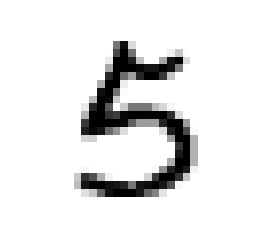

In [4]:
display(X[np.random.randint(40000), :])

In [5]:
def sample_Z(size = [1,100]):
    """Samples from a normal distribution with mean 0.0 and standard deviation 1.0"""
    return np.random.normal(size = size)

In [6]:
tf.reset_default_graph()

In [7]:
Z_ph = tf.placeholder(tf.float32, shape = [None, 100])
image_ph = tf.placeholder(tf.float32, shape = [None, 784])

In [8]:
def generator(Z):
    with tf.variable_scope('generator'):
        hidden1 = tf.layers.dense(Z, 128)
        hidden1 = tf.maximum(hidden1, 0.01)
        logits = tf.layers.dense(hidden1, 784)
        output = (tf.nn.tanh(logits) + tf.ones_like(logits))/2
        return output

In [9]:
def discriminator(image, reuse = False):
    with tf.variable_scope('discriminator', reuse = reuse):
        hidden1 = tf.layers.dense(image, 128)
        hidden1 = tf.maximum(hidden1, 0.01)
        logits = tf.layers.dense(hidden1, 1)
        output = tf.nn.sigmoid(logits)
        return output

In [10]:
generator_sample = generator(Z_ph)
discriminator_real = discriminator(image_ph)
discriminator_fake = discriminator(generator_sample, reuse = True)

In [11]:
discriminator_loss = -tf.reduce_mean(tf.log(discriminator_real)+tf.log(tf.ones_like(discriminator_fake) - discriminator_fake))

In [12]:
generator_loss = -tf.reduce_mean(tf.log(discriminator_fake))

In [13]:
t_vars = tf.trainable_variables()
g_vars = [var for var in t_vars if var.name.startswith('generator')]
d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

In [14]:
d_opt = tf.train.AdamOptimizer(0.0001).minimize(discriminator_loss, var_list = d_vars)
g_opt = tf.train.AdamOptimizer(0.0001).minimize(generator_loss, var_list = g_vars)

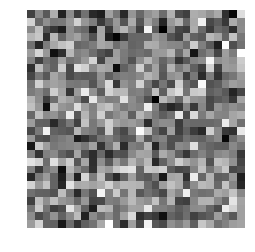

Discriminator Loss: 1.4418829679489136, Generator Loss: 0.5519326329231262, Iteration: 0


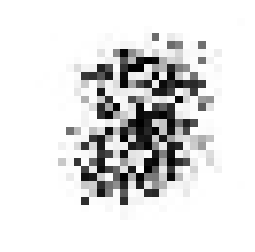

Discriminator Loss: 0.3423219919204712, Generator Loss: 1.9938740730285645, Iteration: 1000


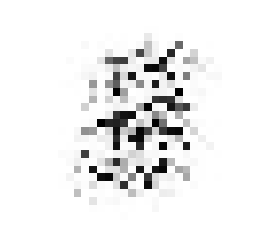

Discriminator Loss: 0.4706782102584839, Generator Loss: 1.5254900455474854, Iteration: 2000


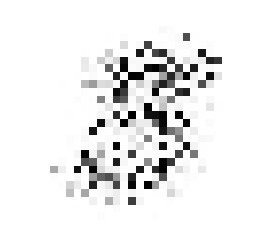

Discriminator Loss: 0.25985318422317505, Generator Loss: 2.2867469787597656, Iteration: 3000


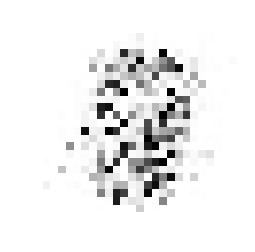

Discriminator Loss: 0.34420111775398254, Generator Loss: 2.1093931198120117, Iteration: 4000


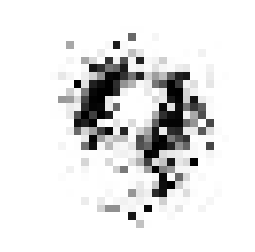

Discriminator Loss: 0.49164801836013794, Generator Loss: 1.8872299194335938, Iteration: 5000


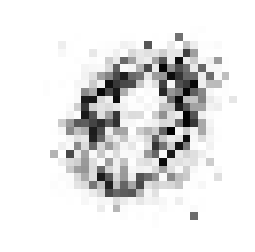

Discriminator Loss: 0.5306379199028015, Generator Loss: 1.90572988986969, Iteration: 6000


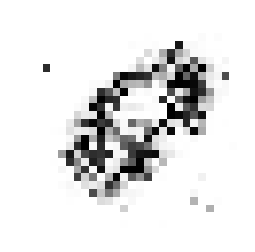

Discriminator Loss: 0.579716682434082, Generator Loss: 1.7341268062591553, Iteration: 7000


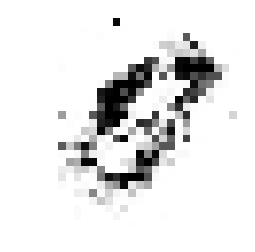

Discriminator Loss: 0.47265303134918213, Generator Loss: 1.9572837352752686, Iteration: 8000


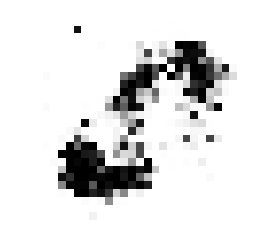

Discriminator Loss: 0.515754759311676, Generator Loss: 1.9444310665130615, Iteration: 9000


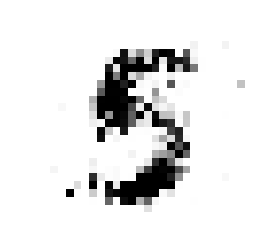

Discriminator Loss: 0.5475957989692688, Generator Loss: 1.8863407373428345, Iteration: 10000


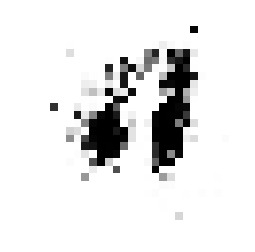

Discriminator Loss: 0.4259031414985657, Generator Loss: 2.2071571350097656, Iteration: 11000


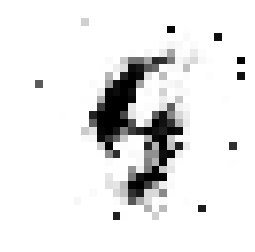

Discriminator Loss: 0.5505595803260803, Generator Loss: 1.9349344968795776, Iteration: 12000


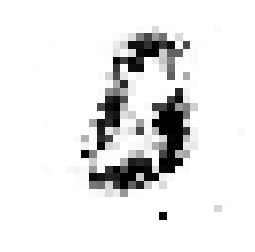

Discriminator Loss: 0.4891502261161804, Generator Loss: 2.2085680961608887, Iteration: 13000


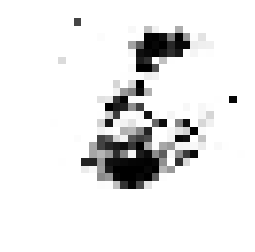

Discriminator Loss: 0.5198321342468262, Generator Loss: 2.0064938068389893, Iteration: 14000


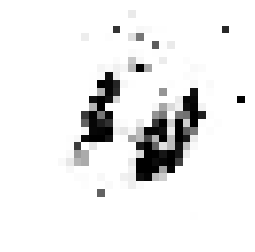

Discriminator Loss: 0.4882752299308777, Generator Loss: 2.2330286502838135, Iteration: 15000


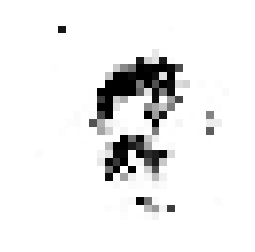

Discriminator Loss: 0.4894104301929474, Generator Loss: 2.232221841812134, Iteration: 16000


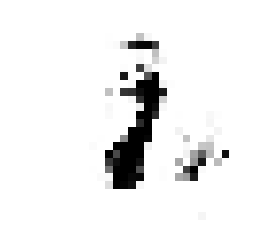

Discriminator Loss: 0.48143571615219116, Generator Loss: 2.345578193664551, Iteration: 17000


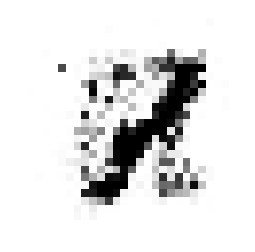

Discriminator Loss: 0.5502921938896179, Generator Loss: 2.233246326446533, Iteration: 18000


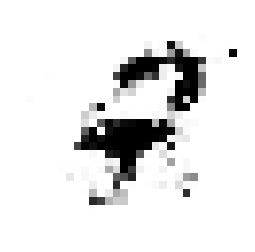

Discriminator Loss: 0.5266933441162109, Generator Loss: 2.274350166320801, Iteration: 19000


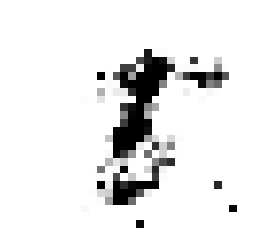

Discriminator Loss: 0.5479238033294678, Generator Loss: 2.2402546405792236, Iteration: 20000


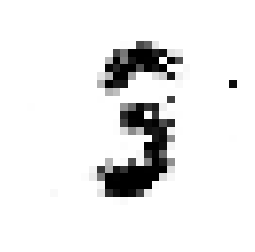

Discriminator Loss: 0.5273638963699341, Generator Loss: 2.238846778869629, Iteration: 21000


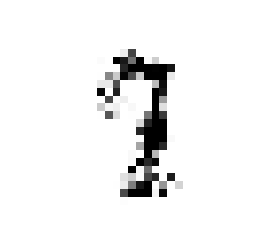

Discriminator Loss: 0.5909144282341003, Generator Loss: 2.352731704711914, Iteration: 22000


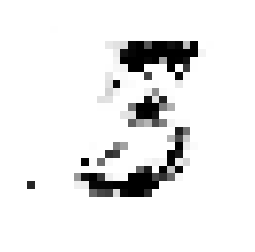

Discriminator Loss: 0.5600067973136902, Generator Loss: 2.2532289028167725, Iteration: 23000


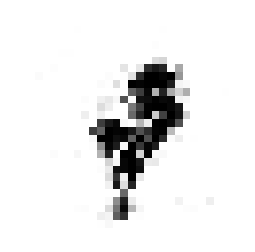

Discriminator Loss: 0.5469931960105896, Generator Loss: 2.3936994075775146, Iteration: 24000


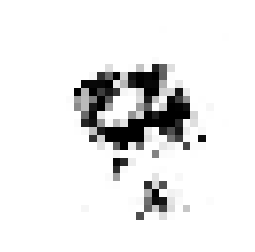

Discriminator Loss: 0.549378514289856, Generator Loss: 2.4121992588043213, Iteration: 25000


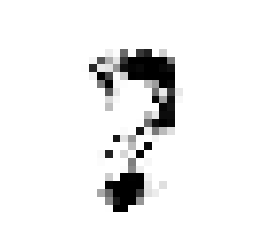

Discriminator Loss: 0.618959903717041, Generator Loss: 2.2998104095458984, Iteration: 26000


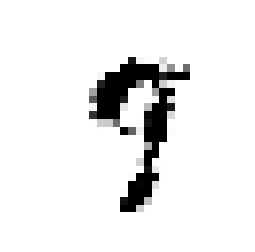

Discriminator Loss: 0.54093337059021, Generator Loss: 2.255770683288574, Iteration: 27000


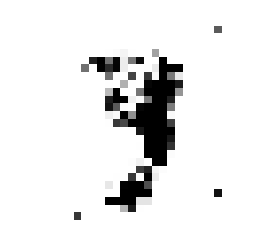

Discriminator Loss: 0.43560028076171875, Generator Loss: 2.704073905944824, Iteration: 28000


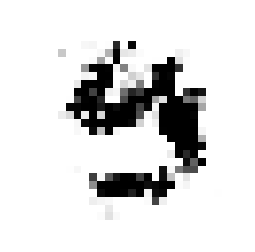

Discriminator Loss: 0.4778893291950226, Generator Loss: 2.6184115409851074, Iteration: 29000


In [15]:
images_generated = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for ep in range(30000):
        X_mini = X[np.random.choice(X.shape[0], 512, replace = False),:]
        _ = sess.run(d_opt, feed_dict = {Z_ph: sample_Z(size = [512,100]), image_ph: X_mini})
        _ = sess.run(g_opt, feed_dict = {Z_ph: sample_Z(size = [512,100])})
        
        d_losses = sess.run(discriminator_loss, feed_dict = {Z_ph: sample_Z(size = [512,100]), image_ph: X_mini})
        g_losses = sess.run(generator_loss, feed_dict = {Z_ph: sample_Z(size = [512,100])})
        
        sample_img = sess.run(generator_sample, feed_dict = {Z_ph:sample_Z()})
        images_generated.append(sample_img)
        if ep%1000 == 0:
            display(sample_img)
            print('Discriminator Loss: {}, Generator Loss: {}, Iteration: {}'.format(d_losses, g_losses, ep))